## Lets take a run ot our model and see how it performs. We will set a indicator for the daily returns for SPY between 7.2% and 11%, which is rear but does happen in the mist of economic crisis. This is a perfect time to look that the 08 crash as well as the current COViD-19 epidemic

## Libraries 

In [1]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

## import data
## We will be looking at the adjustable close for both the S&P and VIX

In [192]:
tickers = ["^VIX", "^GSPC","UVXY"]
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source="yahoo", start = "2002-1-1")["Adj Close"]

### plotting visual movement for both VIX and SPY .As expected the plots show an inverse correlation

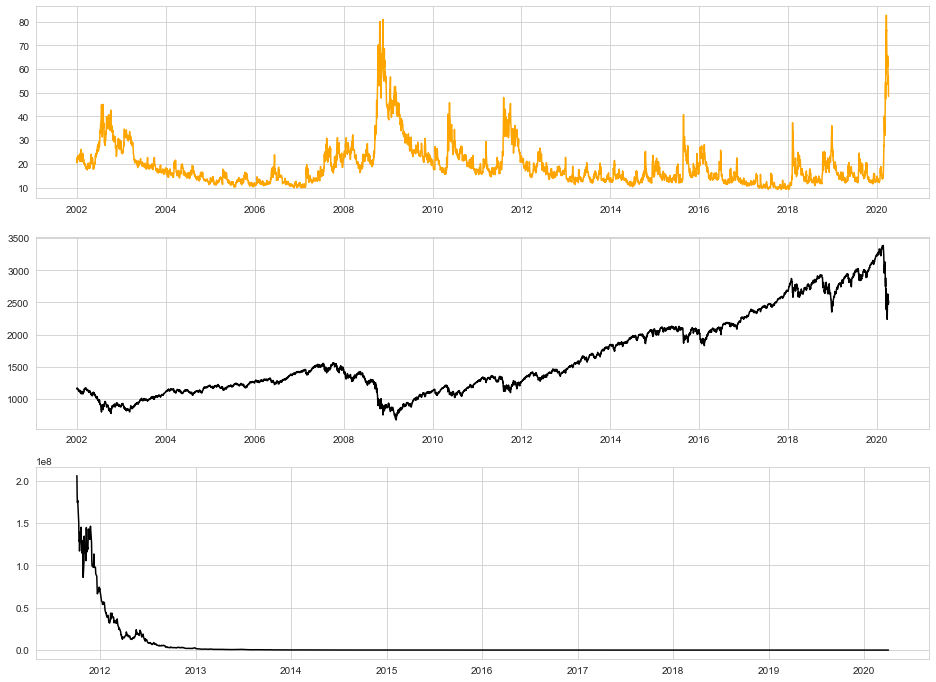

In [193]:
fig, axes = plt.subplots(3,1,figsize = (16,12))
axes[0].plot(data["^VIX"], c = "orange")
axes[1].plot(data["^GSPC"], c = "black")
axes[2].plot(data["UVXY"], c = "black")

### Tracking thre daily returns for each security. We will look at the volitility of the daily returns on a histogram below. what we see is most of the daily returns of SPY between -0.05, and 0.05, where VIX is between -0.2, and .2 with a few outlyers

In [194]:
for t in tickers:
    data[f"{t} daily returns"] = data[f"{t}"].pct_change()

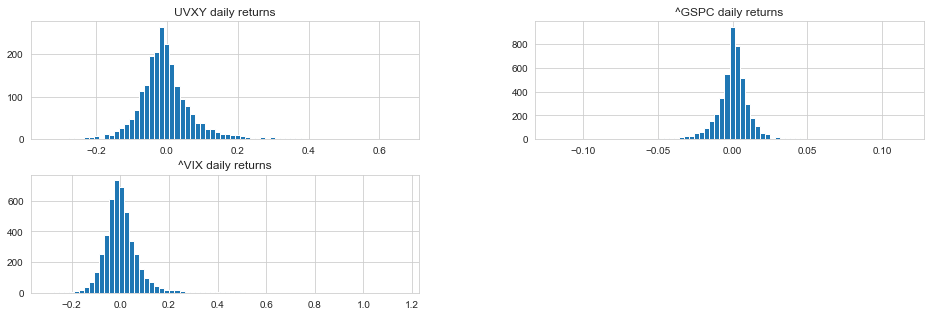

In [195]:
sns.set_style("whitegrid")
data[["^VIX daily returns","^GSPC daily returns", "UVXY daily returns"]].hist(figsize = (16,5), bins = 70);

### The reason for this analysis is the test the theory that as the daily returns of SPY is between 7% and 11%  we can see a sharp increase in VIX. We will test this below but first we will creat a hypithetical portfolio containing both SPY and VIX . We will weigh the portfolio 40% SPY and 60% VIX with a position of 150K in the portfolio. Our other assumption is that we are getting in the market on the first date of 1-3-2006

## Normal Returns

In [196]:
for s in tickers:
    data[f"{s} normal returns"] = data[s]/data[s].iloc[0]

In [197]:
data.head()

,^VIX,^GSPC,UVXY,^VIX daily returns,^GSPC daily returns,UVXY daily returns,^VIX normal returns,^GSPC normal returns,UVXY normal returns
Date,,,,,,,,,
2002-01-02,22.709999,1154.670044,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN
2002-01-03,21.340000,1165.270020,NaN,-0.060326,0.009180,NaN,0.939674,1.009180,NaN
2002-01-04,20.450001,1172.510010,NaN,-0.041706,0.006213,NaN,0.900484,1.015450,NaN
2002-01-07,21.940001,1164.890015,NaN,0.072861,-0.006499,NaN,0.966094,1.008851,NaN
2002-01-08,21.830000,1160.709961,NaN,-0.005014,-0.003588,NaN,0.961251,1.005231,NaN


## Allocations

In [198]:
weights = [0.3, 0.5, 0.2]
for s,w in zip(tickers, weights):
    data[f"{s} allocation"] = data[f"{s} normal returns"] * w

In [199]:
data.head()

,^VIX,^GSPC,UVXY,^VIX daily returns,^GSPC daily returns,UVXY daily returns,^VIX normal returns,^GSPC normal returns,UVXY normal returns,^VIX allocation,^GSPC allocation,UVXY allocation
Date,,,,,,,,,,,,
2002-01-02,22.709999,1154.670044,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.300000,0.500000,NaN
2002-01-03,21.340000,1165.270020,NaN,-0.060326,0.009180,NaN,0.939674,1.009180,NaN,0.281902,0.504590,NaN
2002-01-04,20.450001,1172.510010,NaN,-0.041706,0.006213,NaN,0.900484,1.015450,NaN,0.270145,0.507725,NaN
2002-01-07,21.940001,1164.890015,NaN,0.072861,-0.006499,NaN,0.966094,1.008851,NaN,0.289828,0.504425,NaN
2002-01-08,21.830000,1160.709961,NaN,-0.005014,-0.003588,NaN,0.961251,1.005231,NaN,0.288375,0.502615,NaN


## Position -> 150K

In [200]:
for x in tickers:
    data[f"{x} position"] = data[f"{x} allocation"] * 150000

In [201]:
data.head()

,^VIX,^GSPC,UVXY,^VIX daily returns,^GSPC daily returns,UVXY daily returns,^VIX normal returns,^GSPC normal returns,UVXY normal returns,^VIX allocation,^GSPC allocation,UVXY allocation,^VIX position,^GSPC position,UVXY position
Date,,,,,,,,,,,,,,,
2002-01-02,22.709999,1154.670044,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.300000,0.500000,NaN,45000.000000,75000.000000,NaN
2002-01-03,21.340000,1165.270020,NaN,-0.060326,0.009180,NaN,0.939674,1.009180,NaN,0.281902,0.504590,NaN,42285.338863,75688.506793,NaN
2002-01-04,20.450001,1172.510010,NaN,-0.041706,0.006213,NaN,0.900484,1.015450,NaN,0.270145,0.507725,NaN,40521.799711,76158.770372,NaN
2002-01-07,21.940001,1164.890015,NaN,0.072861,-0.006499,NaN,0.966094,1.008851,NaN,0.289828,0.504425,NaN,43474.243234,75663.824100,NaN
2002-01-08,21.830000,1160.709961,NaN,-0.005014,-0.003588,NaN,0.961251,1.005231,NaN,0.288375,0.502615,NaN,43256.276361,75392.314477,NaN


## Lets take a run ot our model and see how it performs. We will set a indicator for the daily returns for SPY and 7.2%, which is rear but does happen in the mist of economic crisis. THis is a perfect time to look that the 08 crash as well as the curren COViD-19 epidemic

### We can see there are 4 dates that this occurred and we just missed 2. in 2020

In [202]:
data.columns

Index(['^VIX', '^GSPC', 'UVXY', '^VIX daily returns', '^GSPC daily returns',
       'UVXY daily returns', '^VIX normal returns', '^GSPC normal returns',
       'UVXY normal returns', '^VIX allocation', '^GSPC allocation',
       'UVXY allocation', '^VIX position', '^GSPC position', 'UVXY position'],
      dtype='object')

In [203]:
data[data["^GSPC daily returns"] * 100 > 7.2][["^VIX","^GSPC", '^GSPC daily returns']]

,^VIX,^GSPC,^GSPC daily returns
Date,,,
2008-10-13,54.990002,1003.349976,0.115800
2008-10-28,66.959999,940.510010,0.107890
2020-03-13,57.830002,2711.020020,0.092871
2020-03-24,61.669998,2447.330078,0.093828


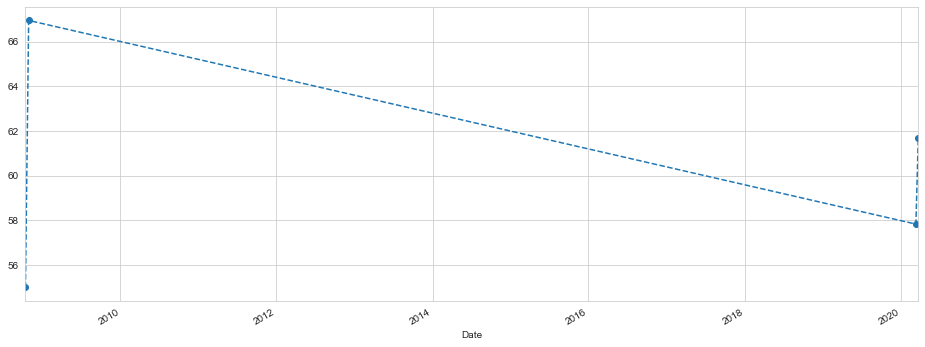

In [204]:
data[(data["^GSPC daily returns"] * 100 > 7.2)]["^VIX"].plot(figsize = (16,6), marker = "o", ls = "--")

## lets take a look at each date where SpY was 7.2 or above. To get a better look at this we will take a few days before and after  the set date

## 2008-10-13

### SPY daily returns up 11.5 %

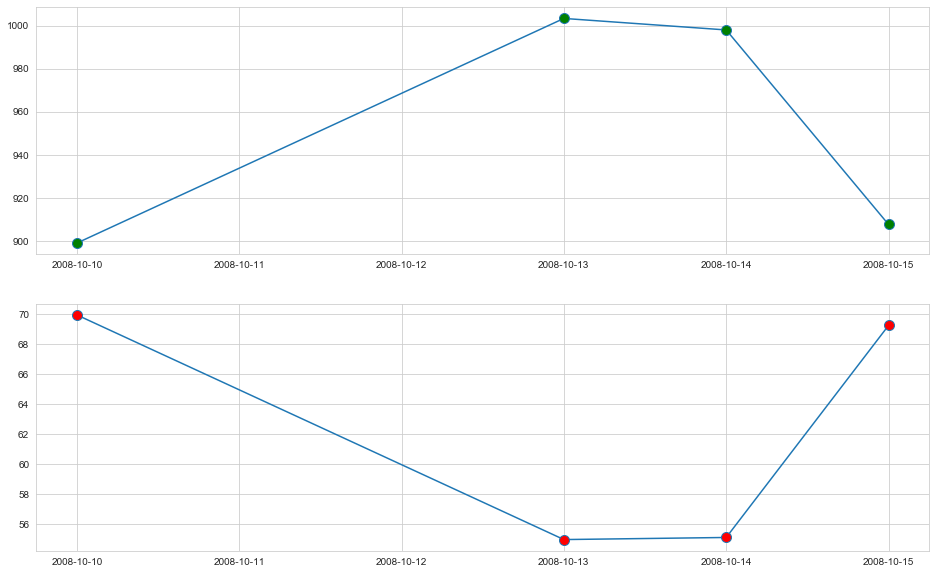

In [205]:
fig, axes = plt.subplots(2,1, figsize = (16,10))
axes[0].plot(data.loc["2008-10-10":"2008-10-15"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2008-10-10":"2008-10-15"]["^VIX"], marker = "o", mfc = "r", ms = 10)

### 2008-10-28

### SpY daily returns spike 10.5%

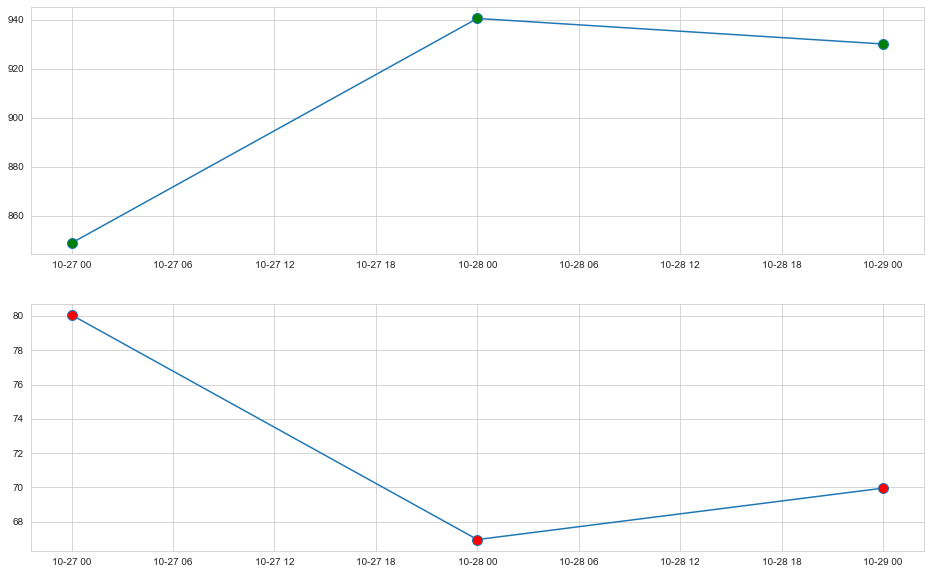

In [206]:
fig, axes = plt.subplots(2,1, figsize = (16,10));
axes[0].plot(data.loc["2008-10-25":"2008-10-29"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2008-10-25":"2008-10-29"]["^VIX"], marker = "o", mfc = "r", ms = 10)

## 2020-03-13

### SPY Daily returns up 9.3%

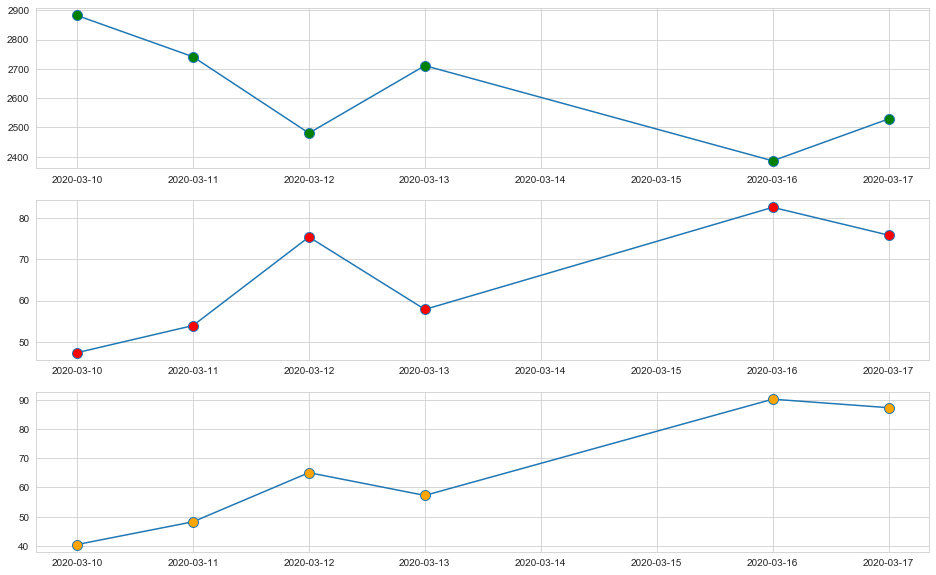

In [207]:
fig, axes = plt.subplots(3,1, figsize = (16,10));
axes[0].plot(data.loc["2020-03-10":"2020-03-17"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2020-03-10":"2020-03-17"]["^VIX"], marker = "o", mfc = "r", ms = 10)
axes[2].plot(data.loc["2020-03-10":"2020-03-17"]["UVXY"], marker = "o", mfc = "orange", ms = 10)

## 2020-03-24


## SPY Daily return up 9.4%

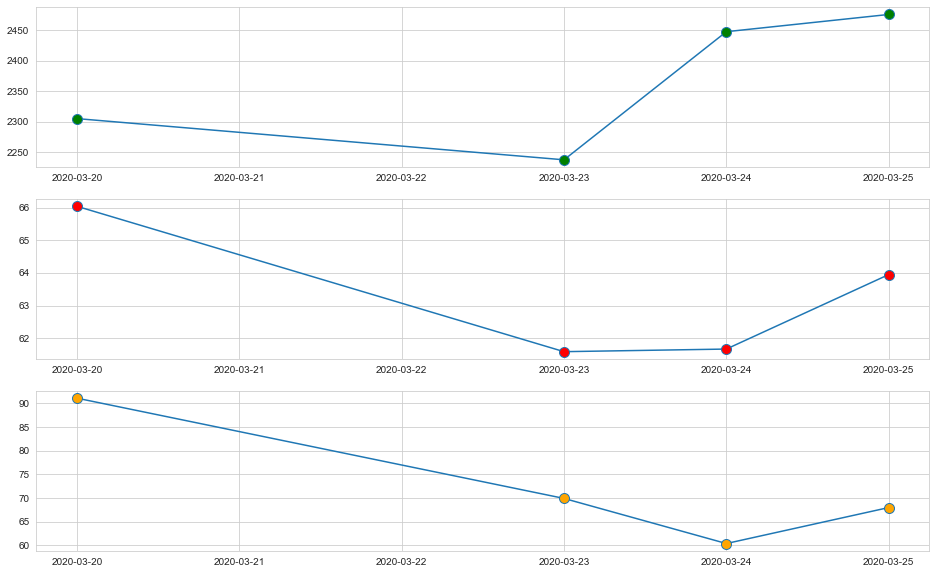

In [208]:
fig, axes = plt.subplots(3,1, figsize = (16,10));
axes[0].plot(data.loc["2020-03-20":"2020-03-25"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2020-03-20":"2020-03-25"]["^VIX"], marker = "o", mfc = "r", ms = 10)
axes[2].plot(data.loc["2020-03-20":"2020-03-25"]["UVXY"], marker = "o", mfc = "orange", ms = 10)

## in summary ad SPY daily returns is in the range of 7.2 and 11 it is almost certain that VIX will have a significant gain. We cna see this clearly in 2020 on the days of 3/13 and 3 /24

### lets take a look at tthe inverse. Since SPY is less likely to jump 7% regularly lets investigate VIX daily returns in relation to S&P

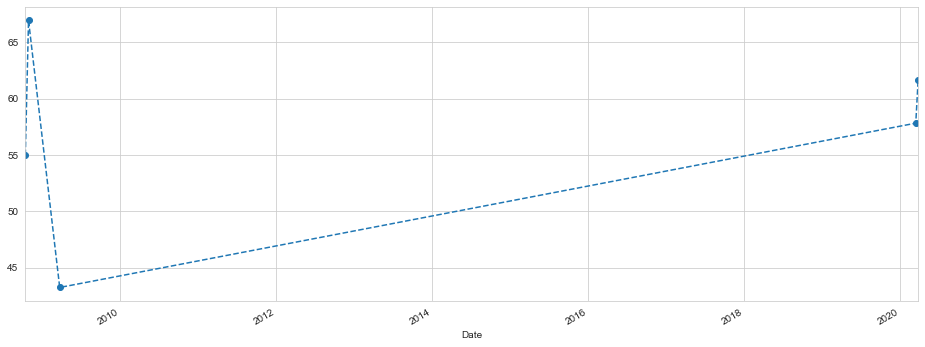

In [209]:
data[(data["^GSPC daily returns"] * 100 > 7)]["^VIX"].plot(figsize = (16,6), marker = "o", ls = "--")

In [210]:
(data["^GSPC daily returns"] * 100).sort_values().head(10)

Date
2020-03-16   -11.984055
2020-03-12    -9.511268
2008-10-15    -9.034978
2008-12-01    -8.929524
2008-09-29    -8.806776
2008-10-09    -7.616710
2020-03-09    -7.596970
2008-11-20    -6.712293
2011-08-08    -6.663446
2008-11-19    -6.115558
Name: ^GSPC daily returns, dtype: float64

## Dates blow where SPY went under -7% daily return

In [211]:
data[data["^GSPC daily returns"] * 100 < -7]["^VIX"]

Date
2008-09-29    46.720001
2008-10-09    63.919998
2008-10-15    69.250000
2008-12-01    68.510002
2020-03-09    54.459999
2020-03-12    75.470001
2020-03-16    82.690002
Name: ^VIX, dtype: float64

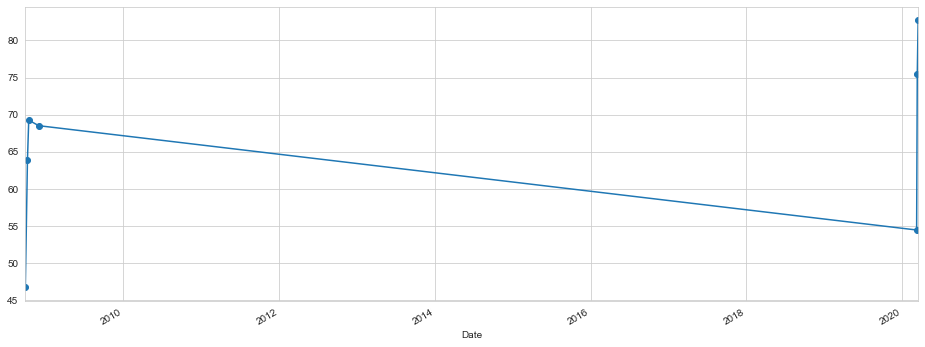

In [212]:
data[data["^GSPC daily returns"] * 100 < -7]["^VIX"].plot(figsize = (16,6), marker = "o")

## GSPC daily under  < -7

### 2008-09-29

## SPY at -8.8 % , with a 3% increase next day as vix drops 15% 

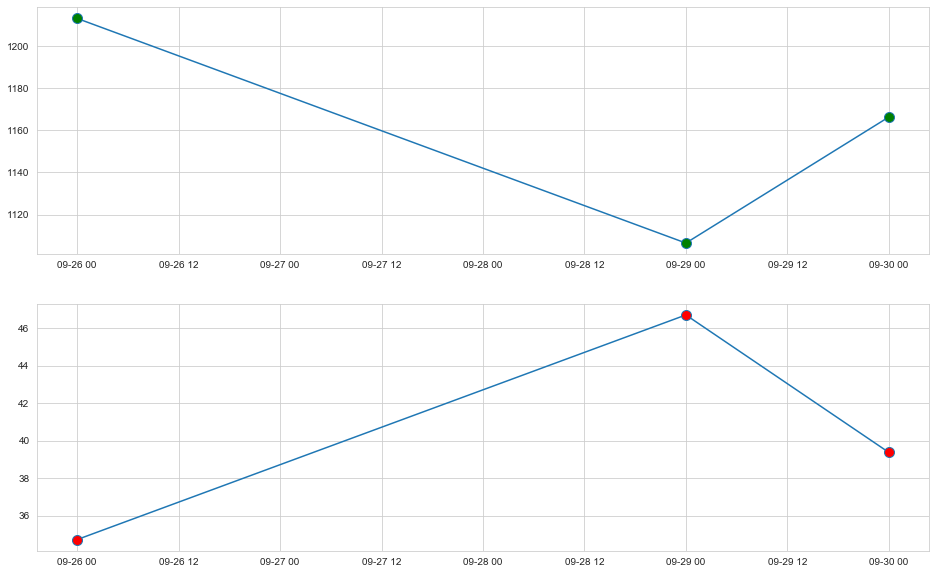

In [213]:
fig, axes = plt.subplots(2,1, figsize = (16,10));
axes[0].plot(data.loc["2008-09-26":"2008-09-30"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2008-09-26":"2008-09-30"]["^VIX"], marker = "o", mfc = "r", ms = 10)

### 2008-10-09

## SPY down 7.6%, insufficient here

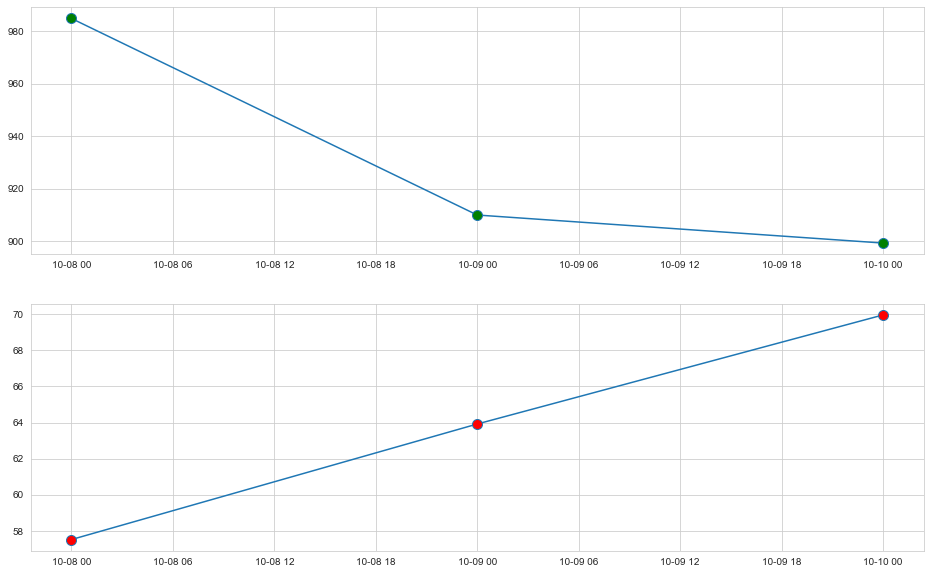

In [215]:
fig, axes = plt.subplots(2,1, figsize = (16,10));
axes[0].plot(data.loc["2008-10-8":"2008-10-11"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2008-10-8":"2008-10-11"]["^VIX"], marker = "o", mfc = "r", ms = 10)

### 2008-10-15

## SPY down 9% -> 3.5 %increase in SPY next day with a 3.4 % drop in VIX

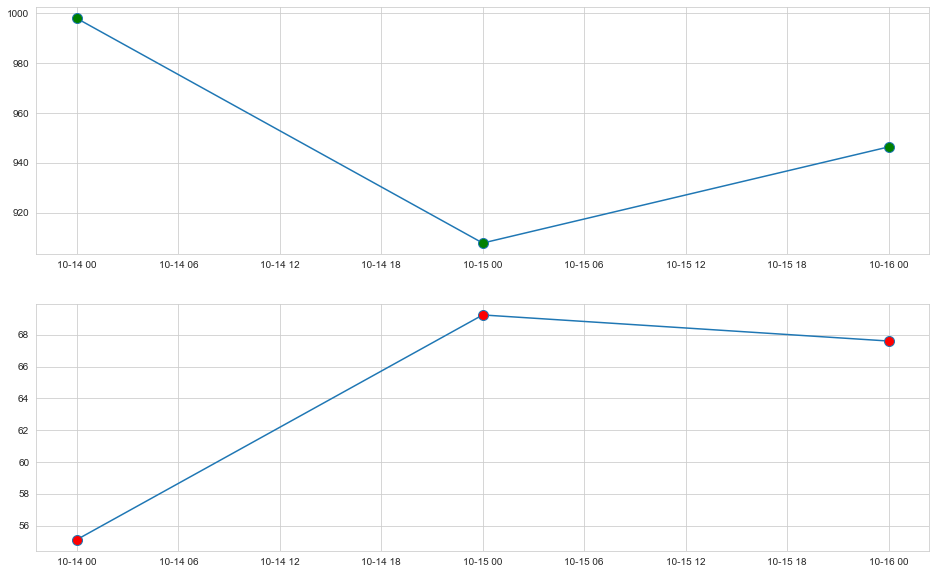

In [216]:
fig, axes = plt.subplots(2,1, figsize = (16,10));
axes[0].plot(data.loc["2008-10-14":"2008-10-16"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2008-10-14":"2008-10-16"]["^VIX"], marker = "o", mfc = "r", ms = 10)

## 2008-12-01

## SPY down 8.9%- 4% jump in SPY and a 9.5% loss in VIX

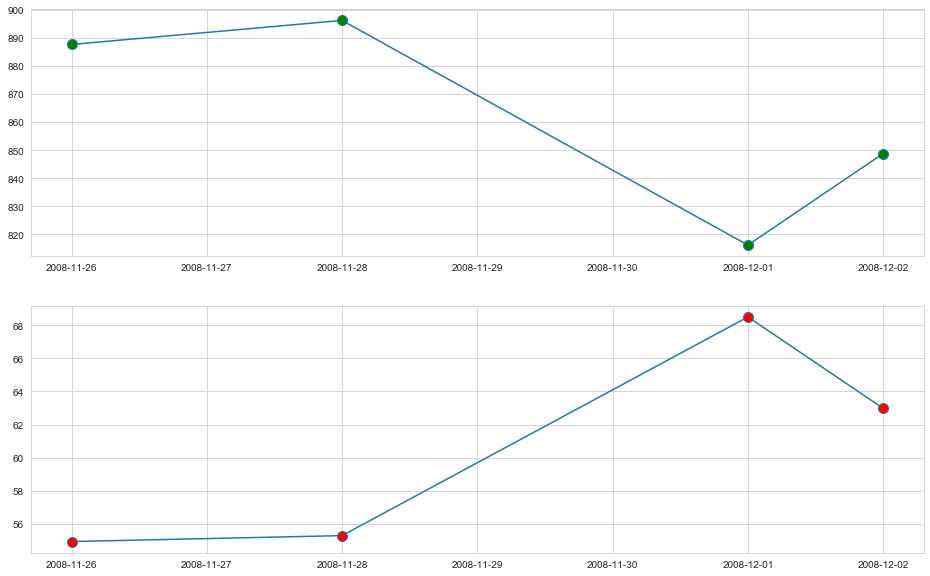

In [217]:
fig, axes = plt.subplots(2,1, figsize = (16,10));
axes[0].plot(data.loc["2008-11-26":"2008-12-02"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2008-11-26":"2008-12-02"]["^VIX"], marker = "o", mfc = "r", ms = 10)

## 2020-03-09

## SPY down 7.6%

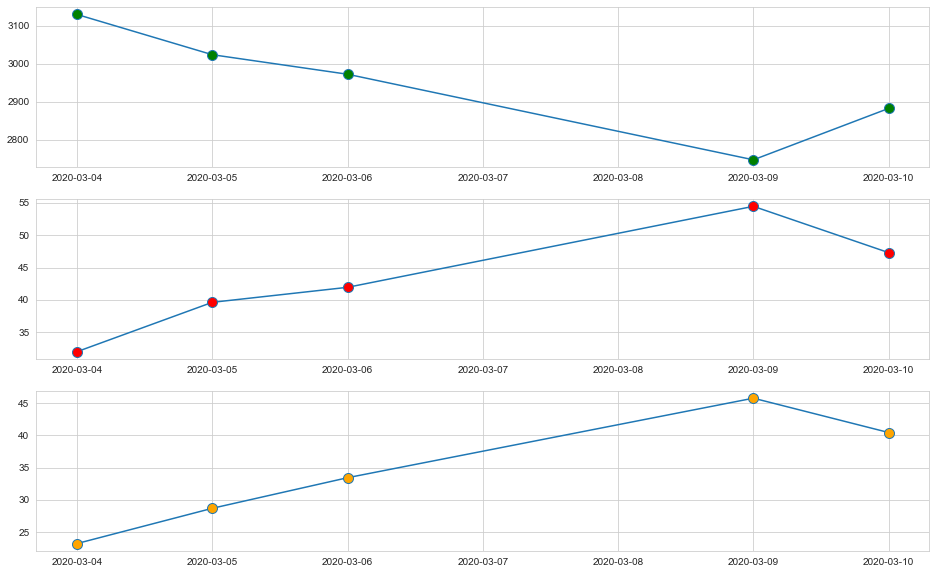

In [218]:
fig, axes = plt.subplots(3,1, figsize = (16,10));
axes[0].plot(data.loc["2020-03-04":"2020-03-10"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2020-03-04":"2020-03-10"]["^VIX"], marker = "o", mfc = "r", ms = 10)
axes[2].plot(data.loc["2020-03-04":"2020-03-10"]["UVXY"], marker = "o", mfc = "orange", ms = 10)


## 2020-03-12 

# Spy down 9.5%

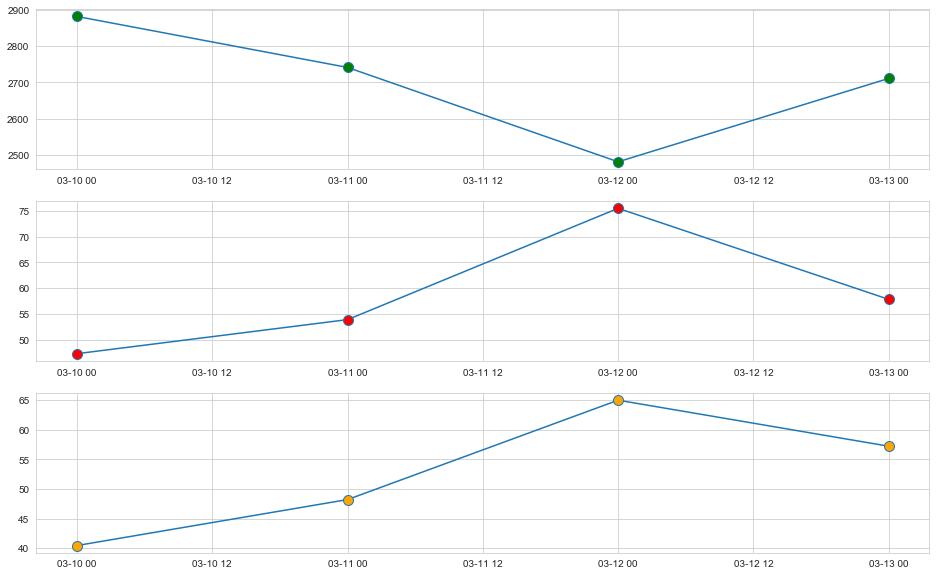

In [219]:
fig, axes = plt.subplots(3,1, figsize = (16,10));
axes[0].plot(data.loc["2020-03-10":"2020-03-14"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2020-03-10":"2020-03-14"]["^VIX"], marker = "o", mfc = "r", ms = 10)
axes[2].plot(data.loc["2020-03-10":"2020-03-14"]["UVXY"], marker = "o", mfc = "orange", ms = 10)

##  2020-03-16

## SPY down 11.9%

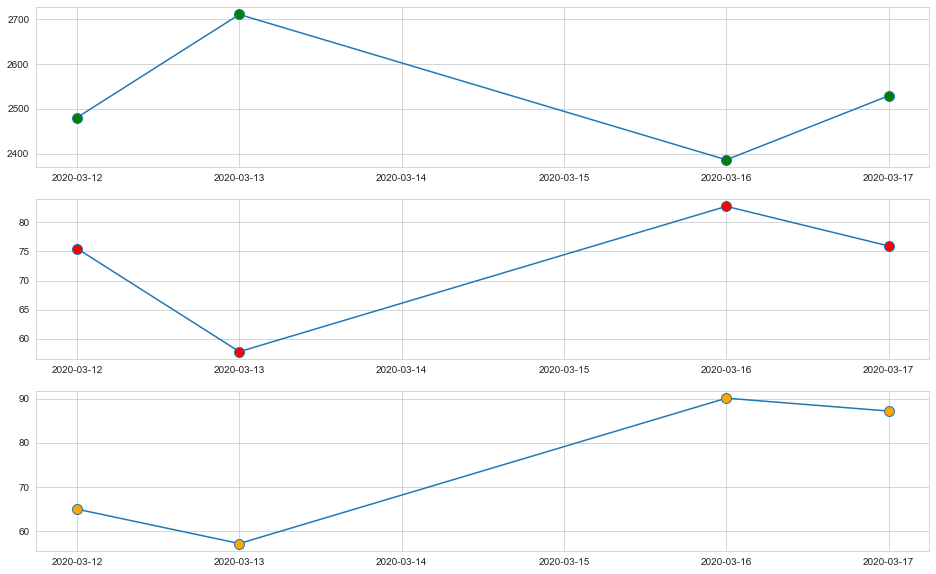

In [220]:
fig, axes = plt.subplots(3,1, figsize = (16,10));
axes[0].plot(data.loc["2020-03-12":"2020-03-17"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2020-03-12":"2020-03-17"]["^VIX"], marker = "o", mfc = "r", ms = 10)
axes[2].plot(data.loc["2020-03-12":"2020-03-17"]["UVXY"], marker = "o", mfc = "orange", ms = 10)